# Session 1: Predicting Eruptions

In [8]:
import sys
# setting path
sys.path.append('..')

from helperlib import (
    statsFunctions as hstats
) 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Importing data and summary statistics

### 1.3. Read data

In [9]:
df = pd.read_csv('Data/faithful.csv')
df.head()

,waiting,duration,day
0,80,4.02,1
1,71,2.15,1
2,57,4.00,1
3,80,4.00,1
4,75,4.00,1


### 1.4. Investigate the parameters

In [10]:
waiting = df['waiting']
duration = df['duration']
day = df['day']

hstats.summarise_data(waiting, 'Waiting')
hstats.summarise_data(duration, 'Duration')
hstats.summarise_data(day, 'Day')

Waiting summary:
 location: 
  {'mean': 72.38947368421053, 'median': 76.0, 'lowerq': 60.0, 'upperq': 82.0, 'min': 108, 'max': 43}
 dispersion: 
  {'range': -65, 'iqr': 22.0, 'var': 187.94284655300223, 'std': 13.70922487061184}
 skewness: 
  {'skew': -0.3411992423797286, 'kurtosis': -0.9532861258369789}
Duration summary:
 location: 
  {'mean': 3.476701754385965, 'median': 4.0, 'lowerq': 2.0, 'upperq': 4.38, 'min': 5.45, 'max': 0.83}
 dispersion: 
  {'range': -4.62, 'iqr': 2.38, 'var': 1.3057524635532491, 'std': 1.142695262768359}
 skewness: 
  {'skew': -0.48272370028665595, 'kurtosis': -1.3820586456241957}
Day summary:
 location: 
  {'mean': 7.649122807017544, 'median': 8.0, 'lowerq': 4.0, 'upperq': 11.0, 'min': 15, 'max': 1}
 dispersion: 
  {'range': -14, 'iqr': 7.0, 'var': 17.09476155176674, 'std': 4.134581182147321}
 skewness: 
  {'skew': 0.029838476771983806, 'kurtosis': -1.188969373508244}


### 1.5. Use the boxplot function to produce a boxplot of waiting.

<AxesSubplot: ylabel='waiting'>

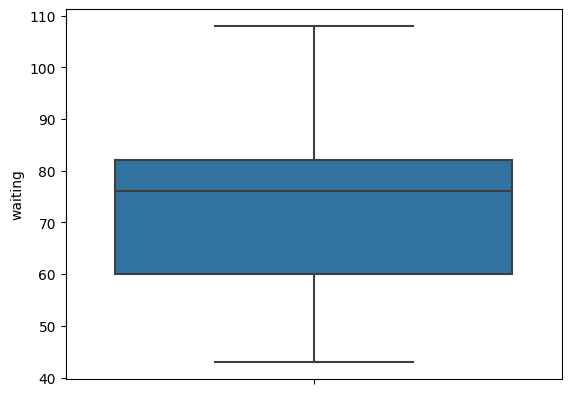

In [11]:
sns.boxplot( y=df["waiting"] )

### 1.6 / 1.7. Use the boxplot function to produce a boxplot of waiting by day.

Text(0, 0.5, 'Waiting time between successive eruptions (mins)')

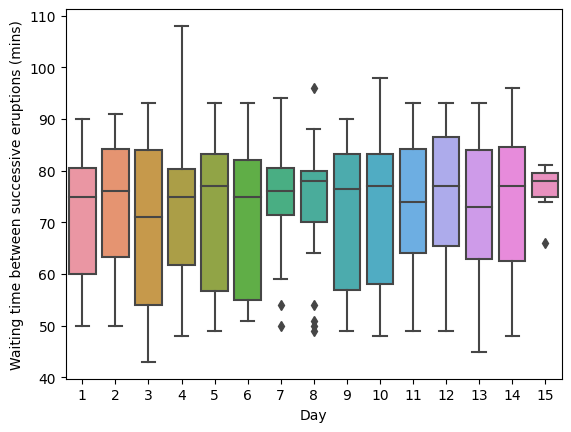

In [12]:
sns.boxplot(data=df, x='day', y='waiting')
plt.xlabel('Day')
plt.ylabel('Waiting time between successive eruptions (mins)')

### 1.8. How are the ends of the whiskers determined? Can you change this?

Horizontal line: median

Box: iqr

whiskers: 1.5 x iqr. (Denotes min / max values)

*Changing whisker length*: `sns.boxplot(..., whis=1.5)`

Dots: outliers

### 1.9. What patterns in waiting time, if any, do you notice? What can you say about day-to-day variation? How long do you predict you need to wait for the next eruption?

## Histograms and kernel density plots

### 2.1. Use min and max to compute the smallest and largest waiting times between eruptions.

In [13]:
min_wait, max_wait = min(waiting), max(waiting)

### 2.2. Use linspace to compute centres of 10 binning intervals between the smallest and largest waiting times. Name the bin variable `bins`.

In [14]:
nbins = 10
bins = np.linspace(min_wait, max_wait, 10)

### 2.3. Use histogram to compute the number of waiting times in each bin interval. Store the result in a variable called `freq`.

In [15]:
freq, bin_edges = np.histogram(waiting, nbins)

### 2.4. Make a histogram using the function barplot. As waiting is a continuous variable, your bars should have WIDTH set to 1.

<AxesSubplot: >

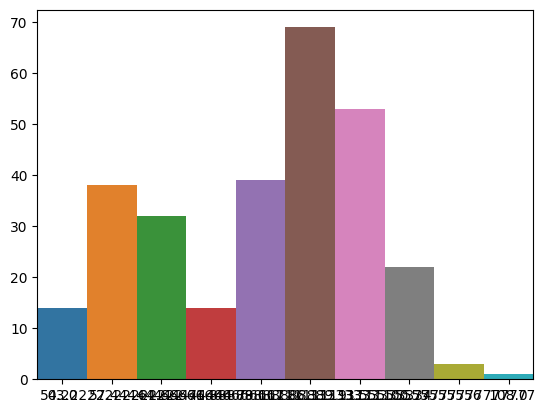

In [16]:
sns.barplot(x=bins, y=freq, width=1)


### 2.6 Make a relative frequency histogram using the function bar. Use hold on so you can overlay the kernel density estimate.

<AxesSubplot: >

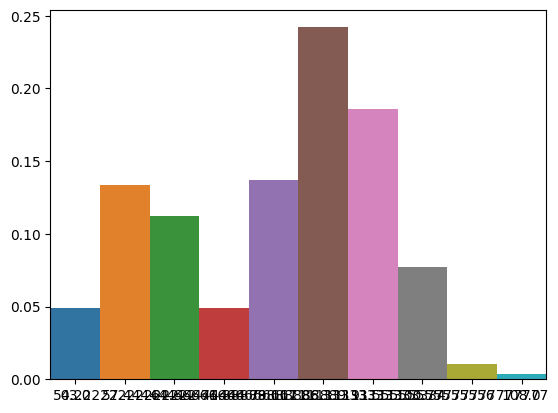

In [17]:
sns.barplot(x=bins, y=freq/sum(freq), width=1)

### 2.6b. If working in Python, you may use *`distplot` from the Seaborn library to create this plot in one command!.

\*`distplot` is a deprecated function. Using displot instead.

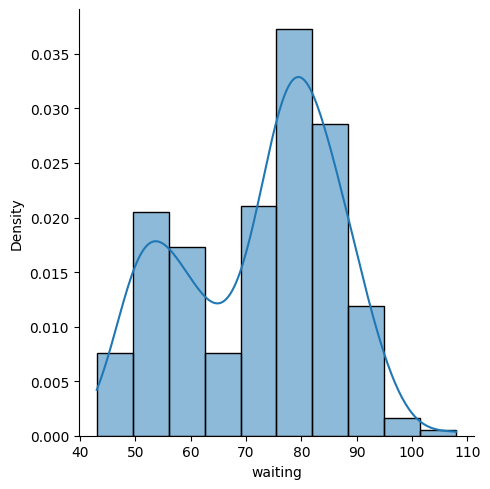

In [43]:
sns.displot(data=df, x='waiting', kde=True, bins=10, stat="density")

### 2.9. Repeat the above using 20 and 50 bin intervals. How many bins would you choose to best represent the distribution of waiting times? A commonly used criterion to determine the number of bins is Sturges’ formula: $ 1 + log 2 n $, where n is the sample size - do you think this is a good choice for these data?

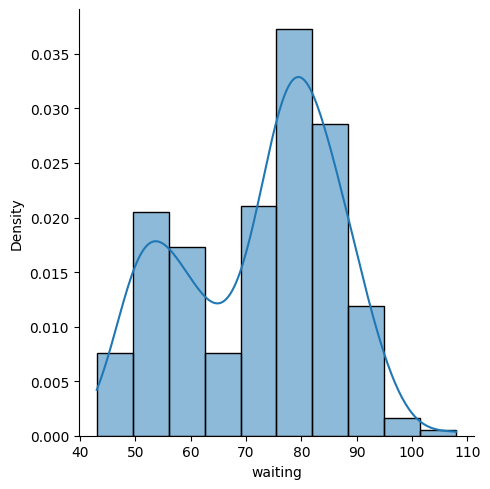

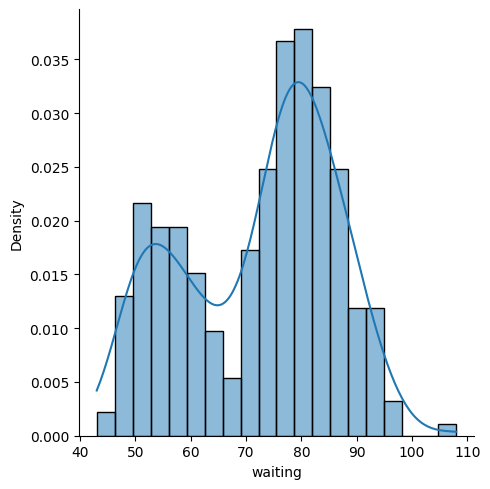

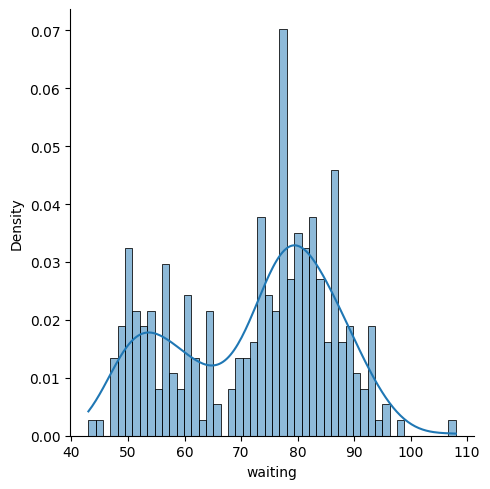

In [61]:
bins = [10, 20, 50]

[sns.displot(
    data=df, 
    x='waiting', 
    kde=True, 
    bins=bin, 
    stat="density") for bin in bins]

